In [14]:
import math
import numpy as np

In [1]:
S0 = 36.
K = 40
r = 0.06
T = 1.0
sigma = 0.2

In [2]:
M = 100
I = 50000

In [3]:
dt = T / M
dt

0.01

In [6]:
df = math.exp(-r * dt)
df

0.9994001799640054

In [11]:
from numpy.random import default_rng
rng = default_rng(100)

In [12]:
rn = rng.standard_normal((M + 1, I))
rn

array([[-1.15754965,  0.2897558 ,  0.78085407, ...,  1.88532745,
         0.04883669, -0.76008788],
       [ 0.46221596, -1.395912  ,  0.13842459, ..., -1.34928847,
         0.1455202 , -0.53244198],
       [ 0.19834459, -0.04028863, -0.73432446, ...,  2.13712981,
         0.1730473 , -0.34458162],
       ...,
       [-0.216127  , -1.30842964,  0.72842515, ..., -0.82476297,
        -0.60226645, -0.40117647],
       [-2.13439258, -1.23770368,  0.58315775, ...,  0.9629997 ,
         0.88619748,  0.77722556],
       [ 2.12548502, -0.41481907,  0.71123043, ...,  1.19292715,
         0.09788468, -0.517276  ]], shape=(101, 50000))

In [15]:
S = np.zeros_like(rn)
S[0] = S0
S

array([[36., 36., 36., ..., 36., 36., 36.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(101, 50000))

In [16]:
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * rn[t])

In [17]:
S

array([[36.        , 36.        , 36.        , ..., 36.        ,
        36.        , 36.        ],
       [36.34887512, 35.02284975, 36.11424661, ..., 35.05552276,
        36.11937202, 35.63292603],
       [36.50795381, 35.00864132, 35.60196885, ..., 36.60100742,
        36.25909652, 35.40235936],
       ...,
       [42.68906876, 39.76043846, 40.68126442, ..., 37.51564022,
        47.89271044, 42.84557783],
       [40.92147699, 38.80380605, 41.17498072, ..., 38.26049541,
        48.76862909, 43.53420495],
       [42.71562316, 38.49860298, 41.78157347, ..., 39.19998858,
        48.88374622, 43.10338058]], shape=(101, 50000))

In [18]:
from pylab import mpl, plt
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

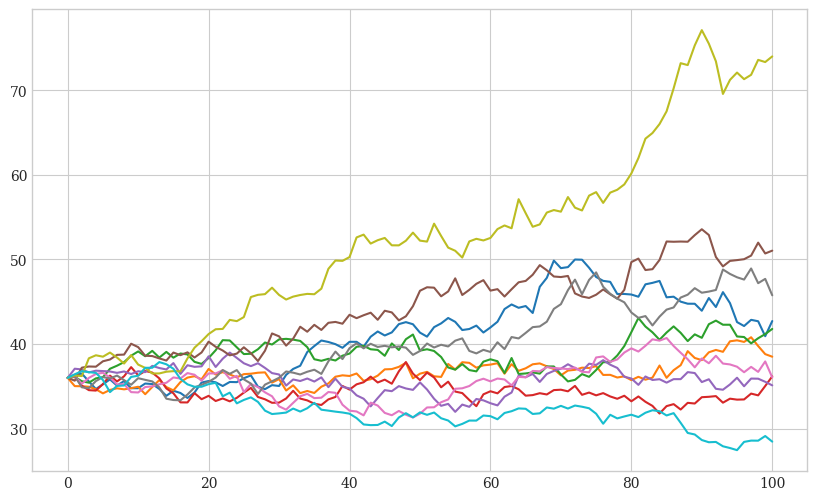

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])

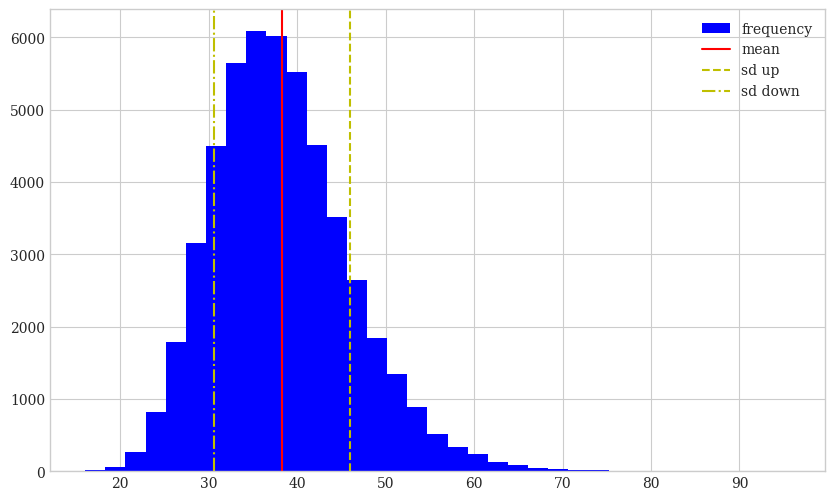

In [20]:
ST = S[-1]
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, color = 'b', label = 'frequency')
plt.axvline(ST.mean(), color = 'r', label = 'mean')
plt.axvline(ST.mean() + ST.std(), ls = '--', color = 'y', label = 'sd up')
plt.axvline(ST.mean() - ST.std(), ls = '-.', color = 'y', label = 'sd down')
plt.legend(loc = 0)


In [21]:
S0 * math.exp(r * T)

38.22611567563295

In [22]:
ST.mean()

np.float64(38.25248936738523)